In [1]:
# -*- coding: utf-8 -*-

# 泰坦尼克号生还分析 
[泰坦尼克号数据](https://www.kaggle.com/c/titanic/data) ：数据集就是来自 Kaggle，包括泰坦尼克号上 2224 名乘客和船员中 891 名的人口学数据和乘客基本信息。

## 提出问题
乘客船舱等级、性别、年龄是否会影响乘客的生还率

- 乘客船舱等级是否会影响生还率?
- 年龄是否会影响生还率？
- 性别是否会影响生还率?<br/>

乘客船舱等级、性别、年龄是三个自变量，生还率是因变量。

## 导入包

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pylab import mpl
%matplotlib inline 
#ipython图形呈现在你的笔记本而非新窗口中

In [3]:
# matplotlib的中文显示
def set_ch():
    mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
    mpl.rcParams['axes.unicode_minus'] = False     # 解决保存图像是负号'-'显示为方块的问题
set_ch()

## 导入数据

In [4]:
filename = 'titanic-data.csv'
titanic_df = pd.read_csv(filename)

## 初识数据

In [5]:
#titanic_df.columns
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- PassengerId => 乘客ID
- Survived => 是否生还
- Pclass => 乘客等级(1/2/3等舱位)
- Name => 乘客姓名
- Sex => 性别
- Age => 年龄
- SibSp => 堂兄弟/妹个数
- Parch => 父母与小孩个数
- Ticket => 船票信息
- Fare => 票价
- Cabin => 客舱
- Embarked => 登船港口

In [6]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- 乘客生还率大约在38.38% 
- 大多数乘客在三等舱
- 平均年龄约30岁（只计算有年龄记录的）

In [7]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


乘客的年龄、客舱、登船港口信息不全<br/>
先用平均年龄补全年龄缺失

In [8]:
# 获取平均年龄
passenger_mean_age=titanic_df['Age'].mean()
# 用平均年龄填充缺失值
titanic_df.Age.fillna(passenger_mean_age,inplace=True)

In [9]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## 可视化观察数据
乘客船舱等级、性别、年龄

In [10]:
# 获取生还乘客的数据
Survived_1 = titanic_df[titanic_df.Survived==1]
# 获取未生还乘客的数据
Survived_0 = titanic_df[titanic_df.Survived==0]

# 按照name对乘客进行分组后，计算每组的人数 
def group_passenger_count(data,name):
    # 按照name对乘客进行分组后，每个组的人数
    return data.groupby(name)['PassengerId'].count()
 

# 计算每个组的生还率    
def group_passenger_survival_rate(name):
    # 按照name对全体乘客进行分组后，每个组的人数
    group_all_passenger_count=group_passenger_count(titanic_df,name)
    # 按照name对生还乘客进行分组后，每个组的人数
    group_survived_passenger_count=group_passenger_count(survived_passenger_df,name)
    # 每个组的生还率
    return group_survived_passenger_count/group_all_passenger_count

### 人口分布比例

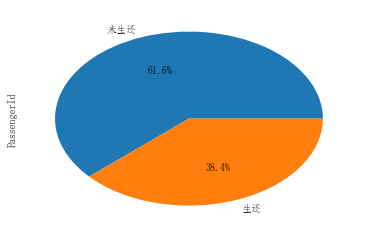

In [11]:
titanic_df.groupby('Survived')['PassengerId'].count().plot(kind='pie',autopct='%1.1f%%',labels=[u"未生还", u"生还"])

可见61.6%的人都遇难了，死的人还是占多数的。


### 乘客船舱等级对生还率的影响

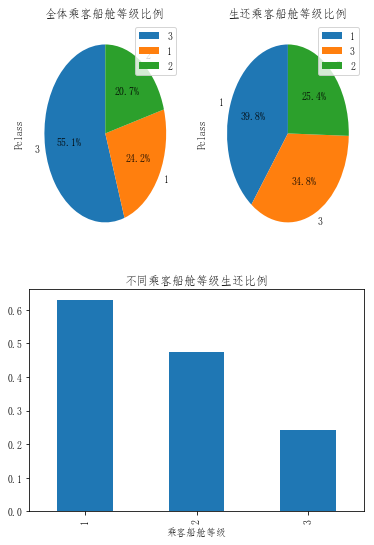

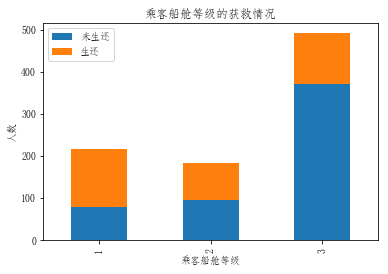

In [12]:
plt.figure(figsize=(6,9)) 
# 全体乘客船舱等级比例
plt.subplot2grid((2,2),(0,0)) 
titanic_df.Pclass.value_counts().plot(kind='pie',title=u'全体乘客船舱等级比例', \
                                       autopct='%1.1f%%', startangle = 90, legend=True)

# 生还乘客船舱等级比例
plt.subplot2grid((2,2),(0,1)) 
Survived_1.Pclass.value_counts().plot(kind='pie',title=u'生还乘客船舱等级比例', \
                                        autopct='%1.1f%%', startangle = 90, legend=True)
# 不同乘客船舱等级生还比例
plt.subplot2grid((2,2),(1,0),colspan=2) 
titanic_df.groupby('Pclass')['Survived'].mean().plot(kind='bar',title=u"不同乘客船舱等级生还比例")
plt.xlabel(u"乘客船舱等级") 

# 不同乘客船舱等级生还情况
df=pd.DataFrame({u'生还':Survived_1.Pclass.value_counts(), u'未生还':Survived_0.Pclass.value_counts()})
df.plot(kind='bar', stacked=True, title=u"乘客船舱等级的获救情况")
plt.xlabel(u"乘客船舱等级") 
plt.ylabel(u"人数") 

全部乘客中，3等舱的乘客最多，占55.1% ，1等舱和2等舱的乘客占的比例差不多一样。
而生还的乘客中，1等舱的乘客最高，占39.8% ，3等舱的乘客占34.8% ，2等舱的乘客占25.4% 。
1等舱生还高达6成多，2等舱生还不到5成，3等舱生还不到3成。<br/>
船舱等级越高生还率越高，有钱还是有用的。

### 性别对生还率的影响

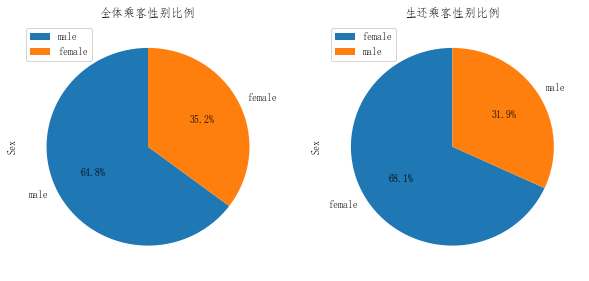

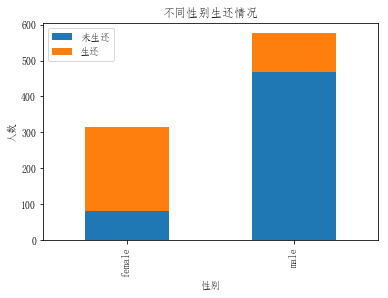

In [13]:
plt.figure(figsize=(10,10)) 
# 全体乘客性别比例
plt.subplot2grid((2,2),(0,0))
titanic_df.Sex.value_counts().plot.pie(title=u'全体乘客性别比例', \
                                       autopct='%1.1f%%', startangle = 90, legend=True)
# 生还乘客性别比例
plt.subplot2grid((2,2),(0,1)) 
Survived_1.Sex.value_counts().plot.pie(title=u'生还乘客性别比例', \
                                        autopct='%1.1f%%', startangle = 90, legend=True)
# 不同性别生还率
df=pd.DataFrame({u'生还':Survived_1.Sex.value_counts(), u'未生还':Survived_0.Sex.value_counts()})
df.plot(kind='bar', stacked=True)
plt.title(u"不同性别生还情况")
plt.xlabel(u"性别") 
plt.ylabel(u"人数") 

全部乘客中，只有35.2%的女性，而生还的乘客中，女性占到了68.1% ；女性的生还率达到了74.2%，而男性的生还率只有18.9%。<br/>
女性生还率比男性要高，外国人果然是女士优先。

### 年龄对生还率的影响

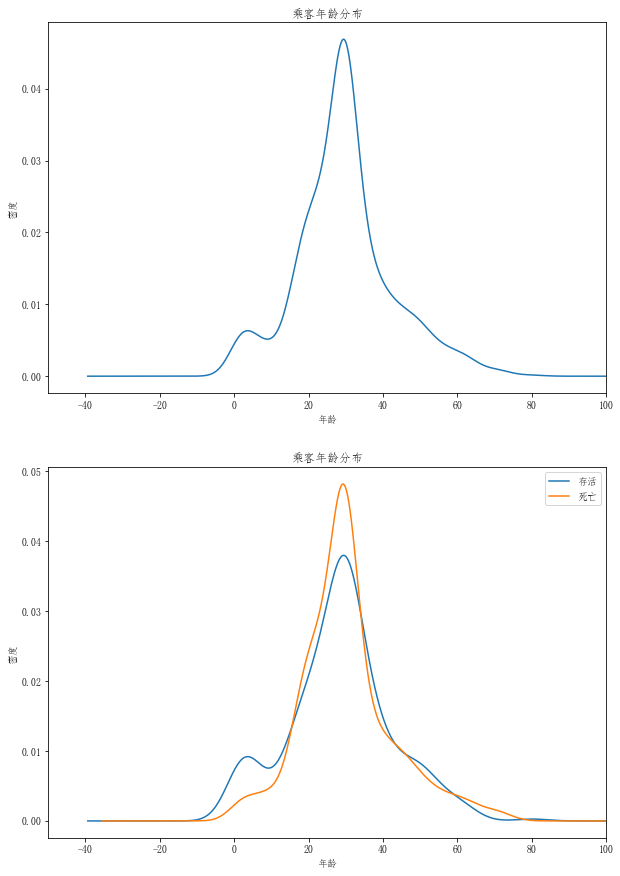

In [14]:
plt.figure(figsize=(10,15)) 
# 全体乘客年龄比例
plt.subplot2grid((2,2),(0,0),colspan=2)
#a kernel desity estimate（核密度估计）
titanic_df.Age.plot(kind='kde', xlim=(-50,100)) 
plt.xlabel(u"年龄")
plt.ylabel(u"密度") 
plt.title(u"乘客年龄分布")

plt.subplot2grid((2,2),(1,0),colspan=2)
Survived_1.Age.plot(kind='kde',xlim=(-50,100))   
Survived_0.Age.plot(kind='kde')
plt.xlabel(u"年龄")
plt.ylabel(u"密度") 
plt.title(u"乘客年龄分布")
plt.legend((u'存活', u'死亡'),loc='best')

因为用年龄的均值填充缺失值，导致核密度估计图中30岁值很大。<br/>
看图初步可知年龄较小的孩子生还率较高，

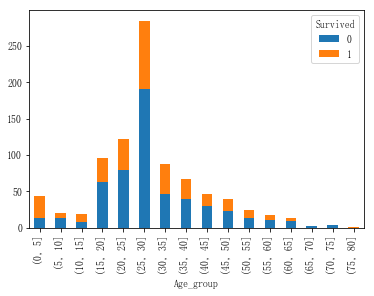

In [15]:
# 通过对Age变量进行分组，对具体年龄的生存与否的人数以及生存率进行可视化：
# step=10看不出来什么，个人感觉5比较合适
bins = np.arange(0,90,5)
titanic_df['Age_group'] = pd.cut(titanic_df['Age'], bins)
titanic_df.groupby(['Age_group', 'Survived'])['Survived'].count().unstack().plot(kind='bar',stacked=True)

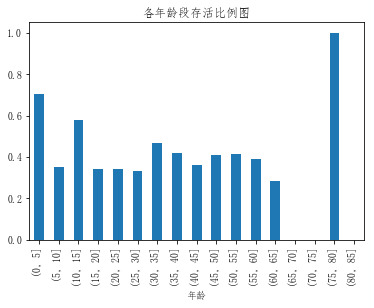

In [16]:
titanic_df.groupby('Age_group')['Survived'].mean().plot(kind='bar')
plt.xlabel(u"年龄")
plt.title(u"各年龄段存活比例图")

从年龄段生还率比例看，0-5岁、10-15岁、75-80岁生还率高。<br/>
外国人还是尊老爱幼的。

## 结论
- 首先是性别因素，女性的生还率达到了74.2%，而男性的生还率只有18.9%。
- 其次是舱位因素，1等舱生还高达6成多，2等舱生还不到5成，3等舱生还不到3成。
- 最后是年龄因素，0-5岁、10-15岁、75-80岁生还率高
<br/>
外国人还是有着良好美德的，女士优先尊老爱幼。

### 分析的局限性
- 我们使用891名乘客的数据，是总体的一部分样本。我们没有做假设检验，不能确定所选样本能准确代表总体。
- 年龄缺失值都用均值代替，会缩小年龄的差异带来偏差，可以考虑按比率随机生成确实年龄。

### 其他可能影响生还率的其它因素
没有考虑的乘客是否有同伴、是否会游泳、自身的身体素质等等。

### 结果的相关性
无法说自变量和因变量之间有因果性，只能说它们之间有相关性。

## 参考
- [数据分析 - 泰坦尼克号生还分析](http://www.cnblogs.com/msdynax/p/6099814.html)<br/>
- [机器学习系列(3)_逻辑回归应用之Kaggle泰坦尼克之灾](http://blog.csdn.net/han_xiaoyang/article/details/49797143)<br/>
- [Matplotlib输出中文显示问题](https://my.oschina.net/u/1180306/blog/279818)